<a href="https://colab.research.google.com/github/Varshita2003/Academic-Institution-Course-Management/blob/master/Code/Vocab_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flattened_data.csv')

In [ ]:
for col in df.columns:
  if col.endswith('percent'):
    result_col = col.replace('percent', 'result')
    df[result_col] = np.where(df[col] >= 60, 1, 0)


In [ ]:
df.columns

Index(['reader_settings_id', 'general_diagnostics_id', 'avatar_id',
       'font_size_id', 'font_color_id', 'highlight_color_id',
       'background_color_id', 'use_uppercase', 'wide_container',
       'language_of_student',
       ...
       '55_feeling', '55_points', '55_date', '56_percent', '56_result',
       '56_time', '56_steps_count', '56_feeling', '56_points', '56_date'],
      dtype='object', length=184)

100_result


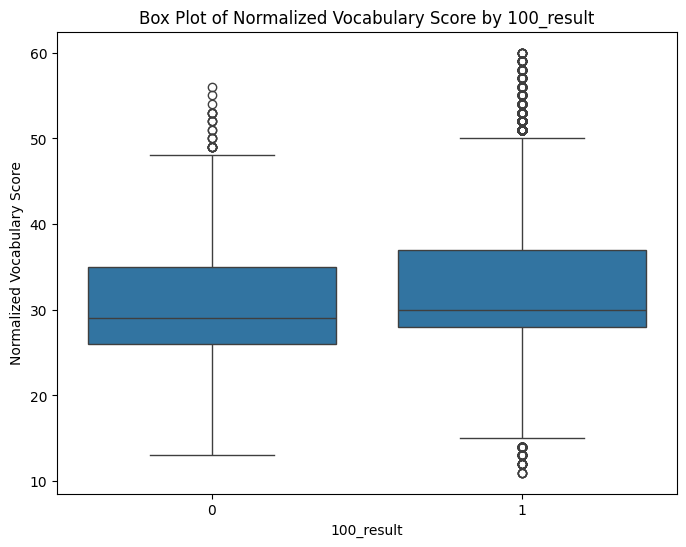

102_result


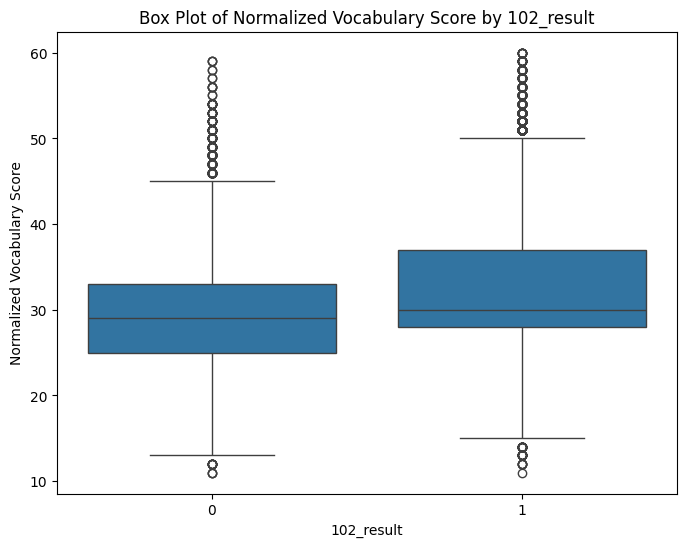

109_result


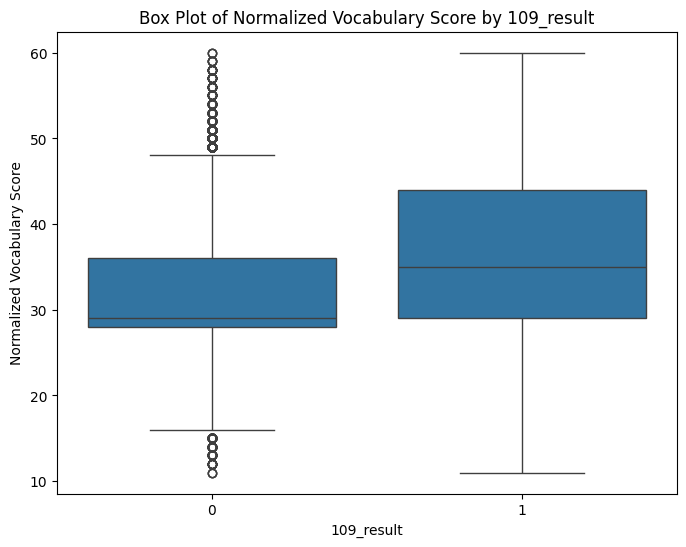

115_result


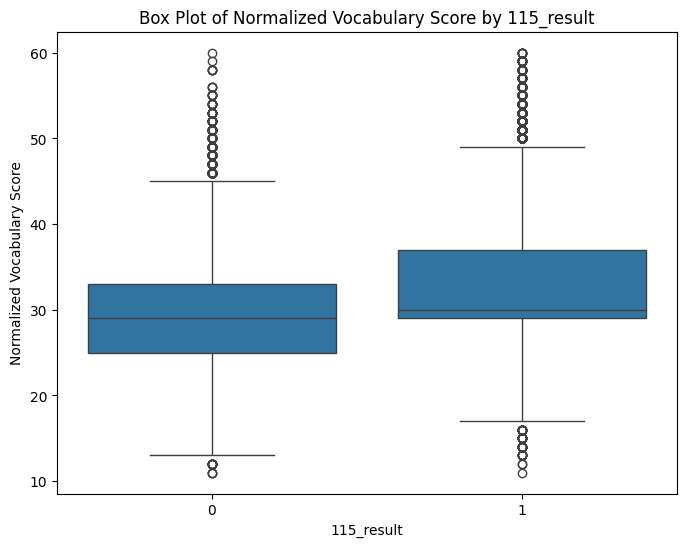

118_result


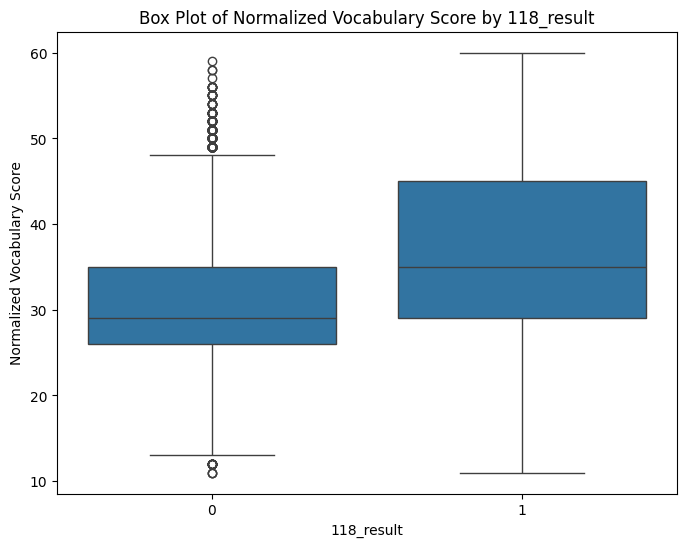

128_result


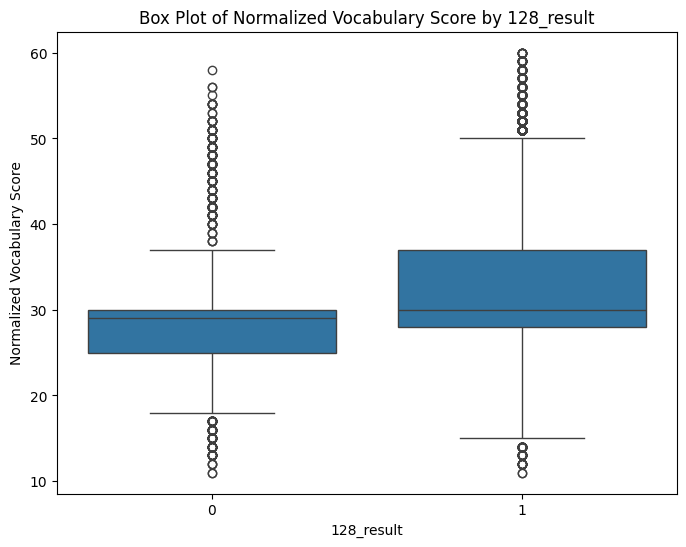

136_result


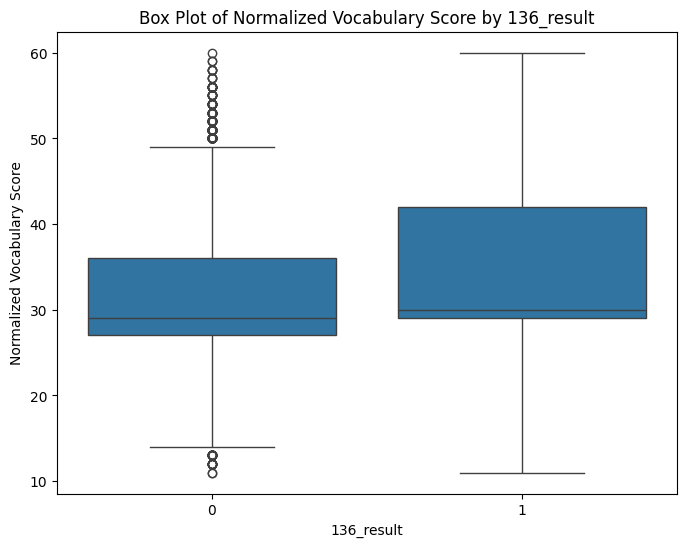

133_result


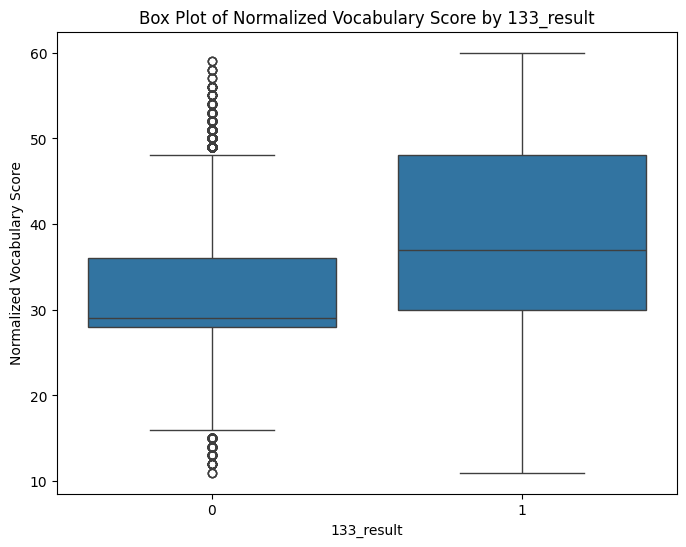

125_result


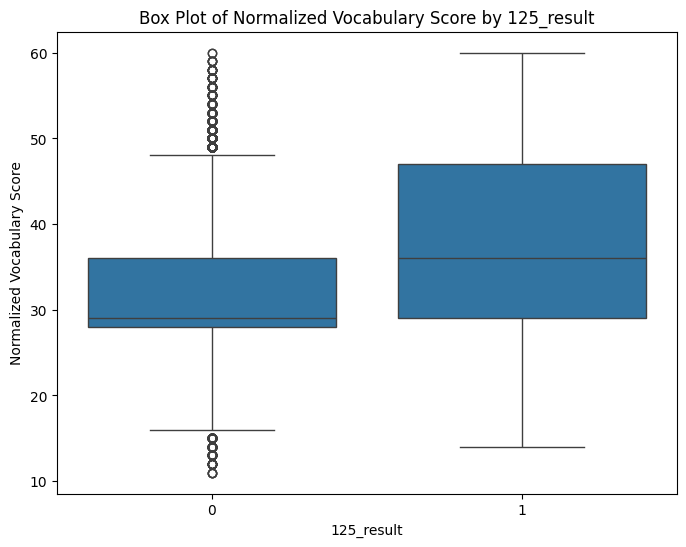

138_result


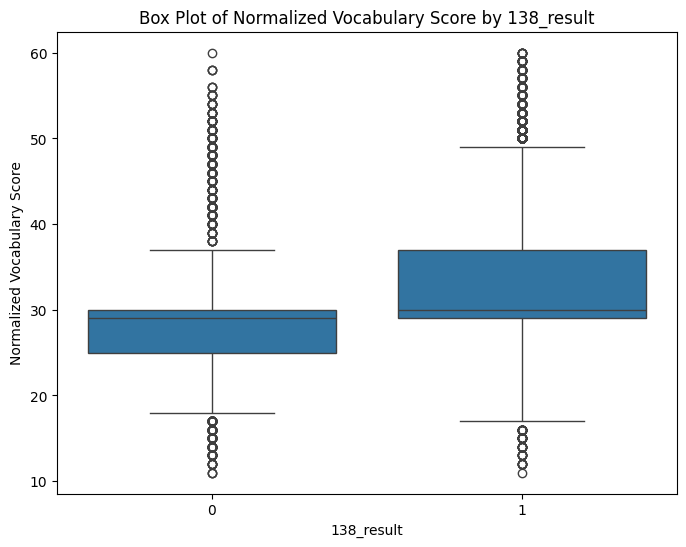

140_result


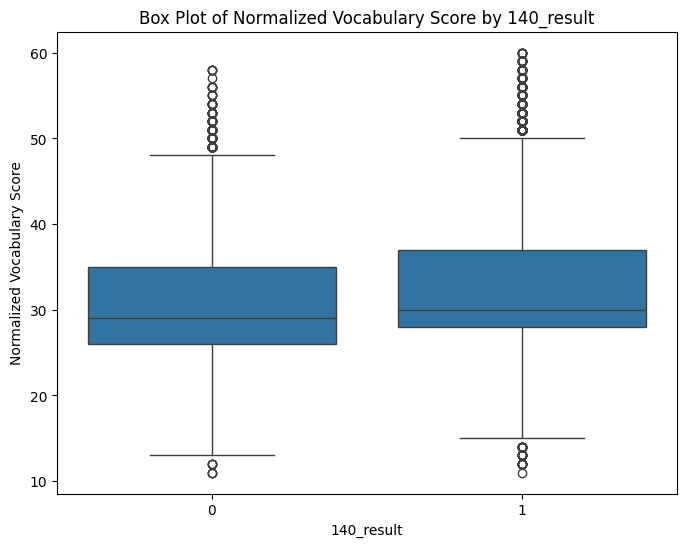

154_result


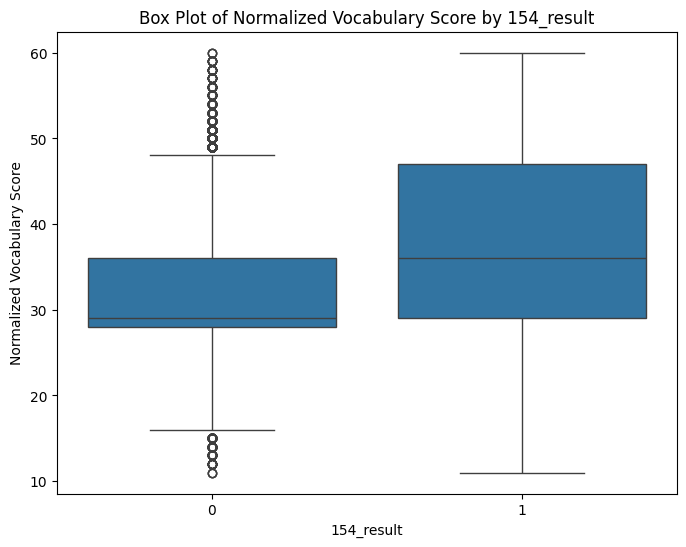

112_result


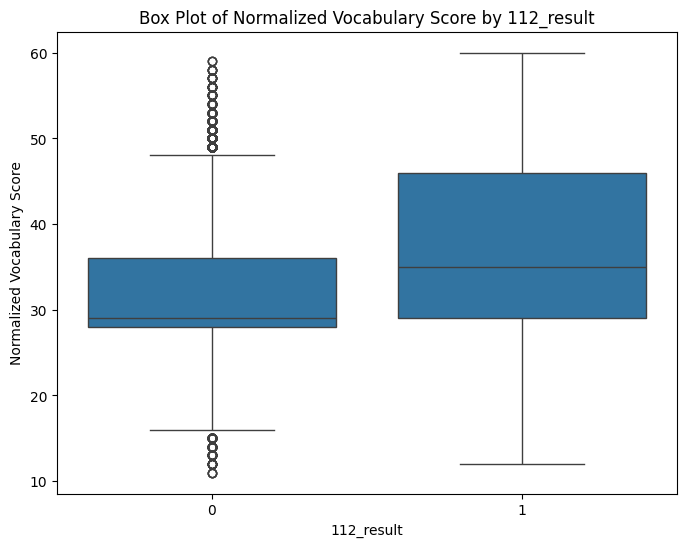

145_result


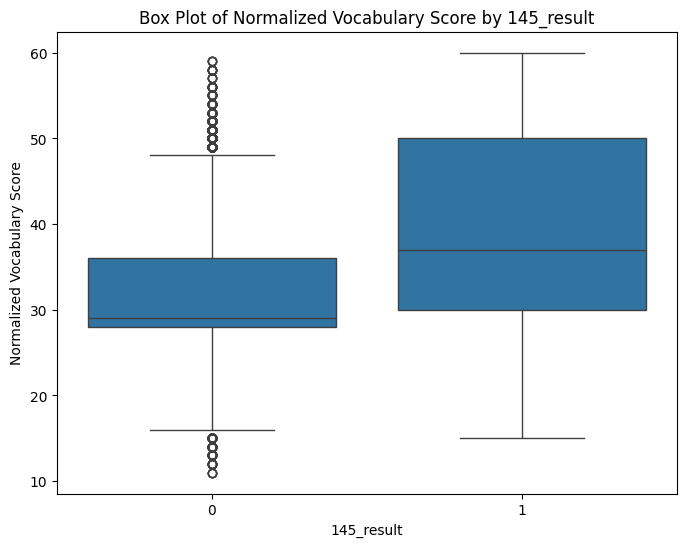

152_result


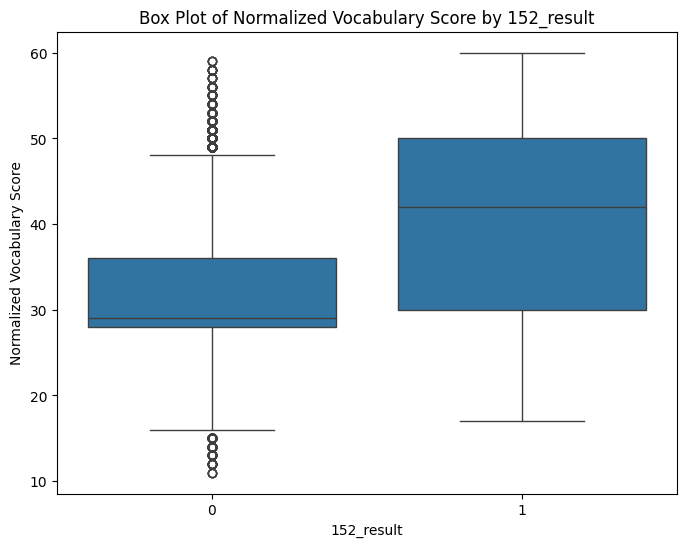

126_result


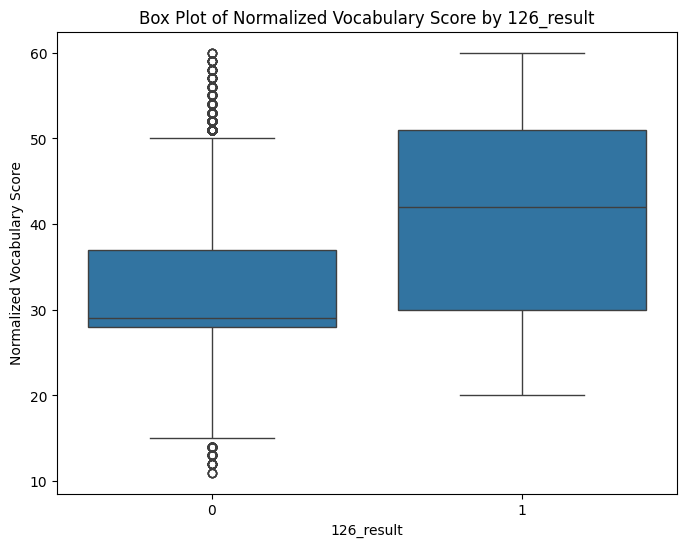

50_result


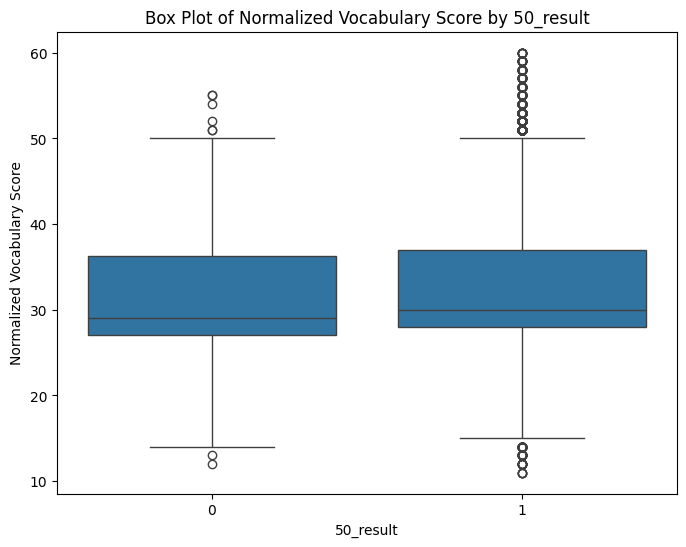

51_result


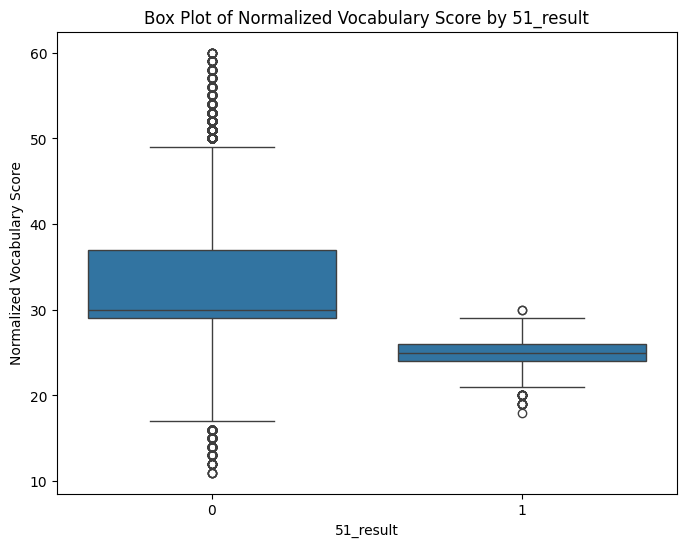

52_result


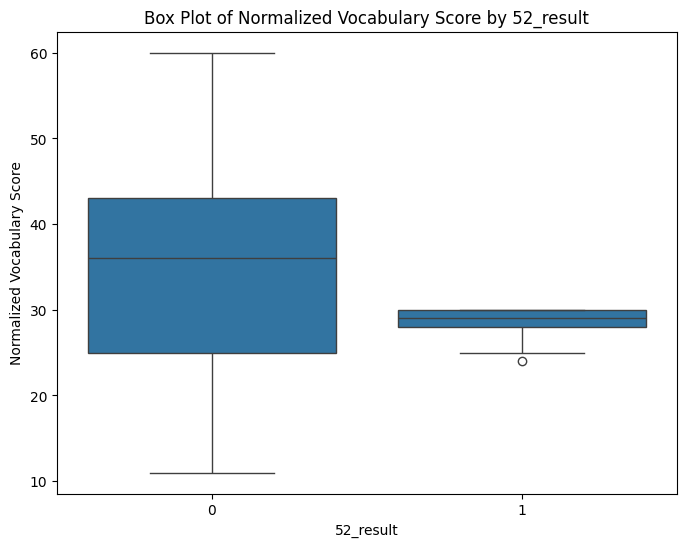

53_result


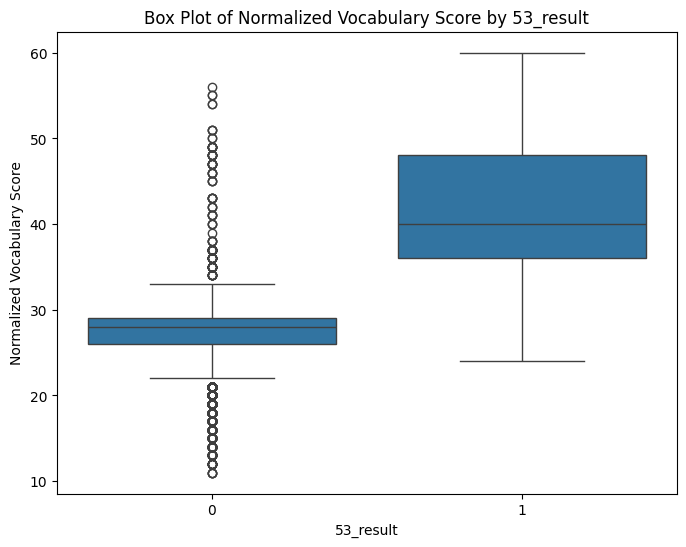

54_result


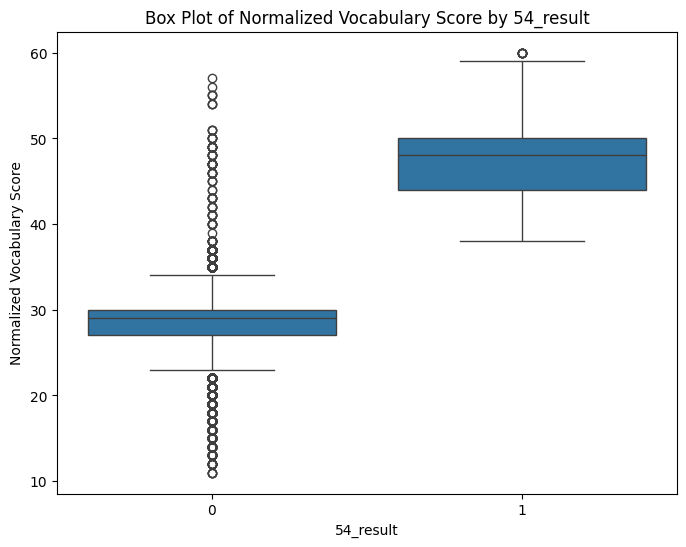

55_result


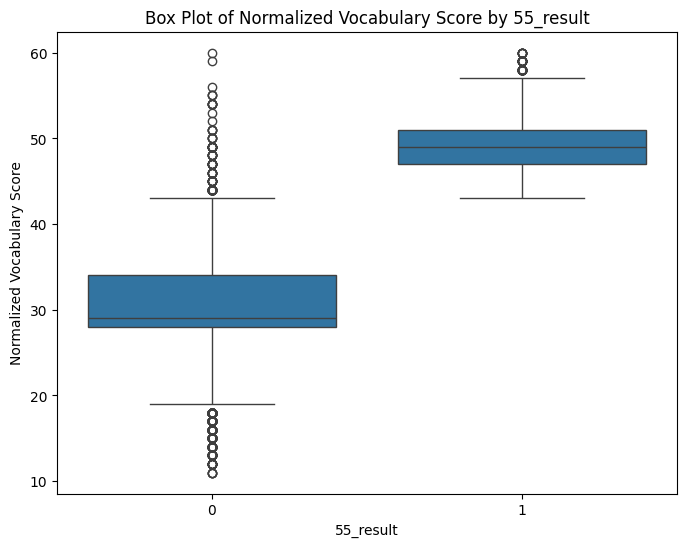

56_result


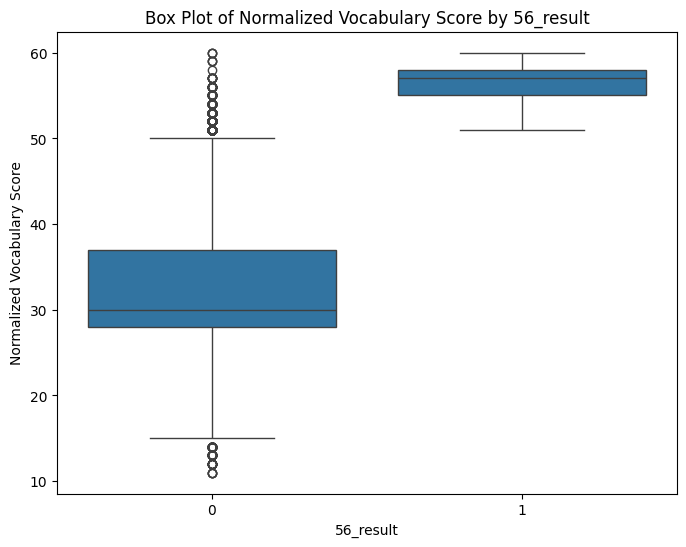

In [ ]:
for col in df.columns:
  if col.endswith('result'):
    print(col)
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y='vocabulary_score_normalized',)
    plt.title(f'Box Plot of Normalized Vocabulary Score by {col}')
    plt.ylabel('Normalized Vocabulary Score')
    plt.xlabel(col)
    plt.show()

In [ ]:
exercises_with_difference = [102, 109, 115, 118, 128, 136, 133, 125, 138, 154, 112, 145, 152, 126]
exercises_with_difference = [str(x) for x in exercises_with_difference]
for col in df.columns:
  if col.endswith('points') and col.removesuffix('_points') in exercises_with_difference:
    print(col)
    exercise = col.removesuffix('_points')
    col_pass = df[df[exercise + '_result'] == 1]['vocabulary_score_normalized'].dropna().tolist()
    col_fail = df[df[exercise + '_result'] == 0]['vocabulary_score_normalized'].dropna().tolist()
    # print(col_pass)
    # print('--------------------------------------------')
    # print(col_fail)
    t_stat, p_value = stats.ttest_ind(col_pass, col_fail, equal_var=False)
    print(f"T-test between Pass and Fail of {exercise} for Normalized Vocabulary Score:")
    print(f"  T-statistic = {t_stat:.3f}, P-value = {p_value:.3f}")
    # break

102_points
T-test between Pass and Fail of 102 for Normalized Vocabulary Score:
  T-statistic = 27.101, P-value = 0.000
109_points
T-test between Pass and Fail of 109 for Normalized Vocabulary Score:
  T-statistic = 30.787, P-value = 0.000
115_points
T-test between Pass and Fail of 115 for Normalized Vocabulary Score:
  T-statistic = 36.929, P-value = 0.000
118_points
T-test between Pass and Fail of 118 for Normalized Vocabulary Score:
  T-statistic = 44.611, P-value = 0.000
128_points
T-test between Pass and Fail of 128 for Normalized Vocabulary Score:
  T-statistic = 21.267, P-value = 0.000
136_points
T-test between Pass and Fail of 136 for Normalized Vocabulary Score:
  T-statistic = 29.635, P-value = 0.000
133_points
T-test between Pass and Fail of 133 for Normalized Vocabulary Score:
  T-statistic = 39.826, P-value = 0.000
125_points
T-test between Pass and Fail of 125 for Normalized Vocabulary Score:
  T-statistic = 31.635, P-value = 0.000
138_points
T-test between Pass and Fail 